# Life cycle of Machine learning Project

## Understanding the Problem Statement
*Data Collection
*Data Checks to perform
*Exploratory data analysis
*Data Pre-Processing
*Model Training
*Choose best model

### 1) Problem statement
This project understands how the insurance price is predicted

### 2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/mirichoi0218/insurance

* The data consists of 11 column and 986 rows.

## 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn Library.

In [6]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [46]:
df = pd.read_csv('Medicalpremium.csv')

In [35]:
cat = [ 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases','KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries' ]

In [47]:
for i in cat:
    df[i] = df[i].apply(str)

In [48]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      986 non-null    int64 
 1   Diabetes                 986 non-null    object
 2   BloodPressureProblems    986 non-null    object
 3   AnyTransplants           986 non-null    object
 4   AnyChronicDiseases       986 non-null    object
 5   Height                   986 non-null    int64 
 6   Weight                   986 non-null    int64 
 7   KnownAllergies           986 non-null    object
 8   HistoryOfCancerInFamily  986 non-null    object
 9   NumberOfMajorSurgeries   986 non-null    object
 10  PremiumPrice             986 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 84.9+ KB


In [50]:
df.shape

(986, 11)

In [51]:
df.isna().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [52]:
df.duplicated().sum()

0

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      986 non-null    int64 
 1   Diabetes                 986 non-null    object
 2   BloodPressureProblems    986 non-null    object
 3   AnyTransplants           986 non-null    object
 4   AnyChronicDiseases       986 non-null    object
 5   Height                   986 non-null    int64 
 6   Weight                   986 non-null    int64 
 7   KnownAllergies           986 non-null    object
 8   HistoryOfCancerInFamily  986 non-null    object
 9   NumberOfMajorSurgeries   986 non-null    object
 10  PremiumPrice             986 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 84.9+ KB


In [8]:
df.nunique()

Age                        49
Diabetes                    2
BloodPressureProblems       2
AnyTransplants              2
AnyChronicDiseases          2
Height                     44
Weight                     74
KnownAllergies              2
HistoryOfCancerInFamily     2
NumberOfMajorSurgeries      4
PremiumPrice               24
dtype: int64

In [9]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


<AxesSubplot:xlabel='Age', ylabel='PremiumPrice'>

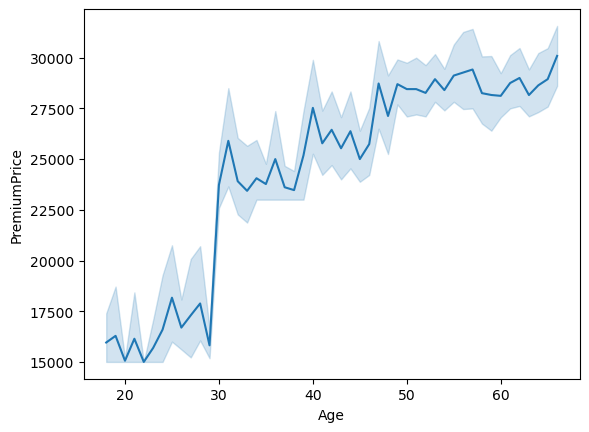

In [13]:
sns.lineplot(x = 'Age',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='Diabetes', ylabel='PremiumPrice'>

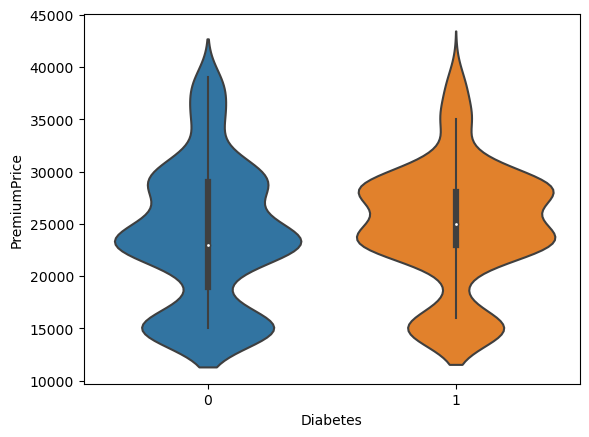

In [17]:
sns.violinplot(x = 'Diabetes',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='BloodPressureProblems', ylabel='PremiumPrice'>

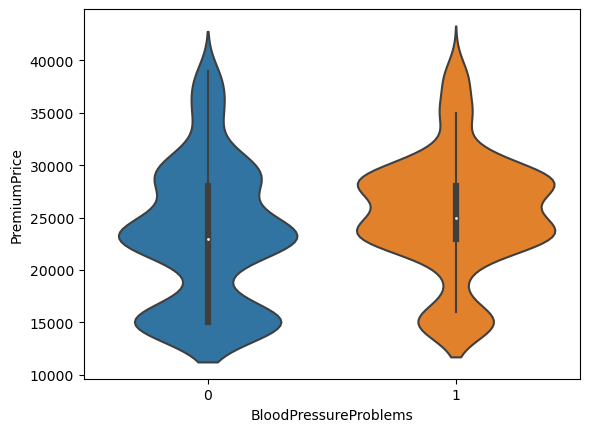

In [19]:
sns.violinplot(x = 'BloodPressureProblems',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='AnyTransplants', ylabel='PremiumPrice'>

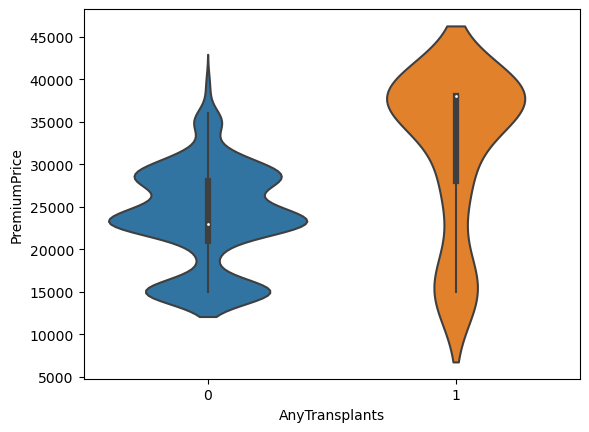

In [20]:
sns.violinplot(x = 'AnyTransplants',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='AnyChronicDiseases', ylabel='PremiumPrice'>

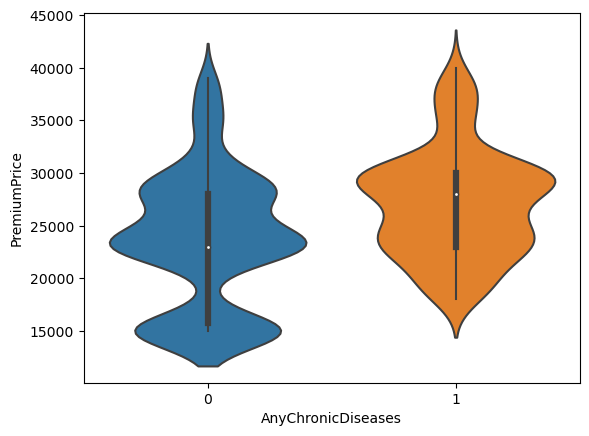

In [21]:
sns.violinplot(x = 'AnyChronicDiseases',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='Height', ylabel='PremiumPrice'>

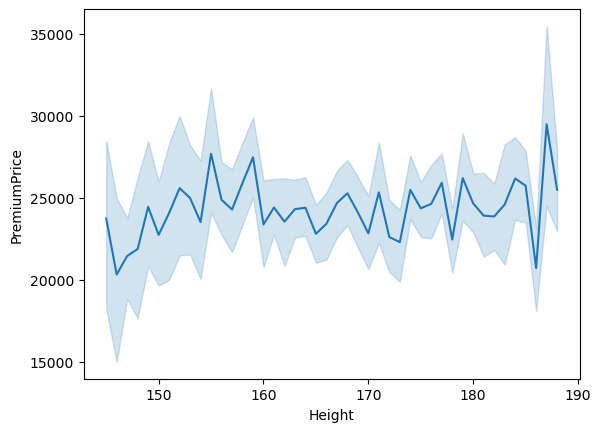

In [22]:
sns.lineplot(x = 'Height',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='Weight', ylabel='PremiumPrice'>

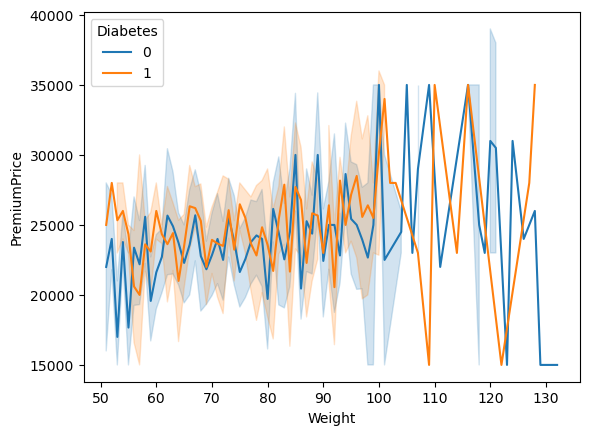

In [36]:
sns.lineplot(x = 'Weight',y='PremiumPrice',data=df,hue='Diabetes')

<AxesSubplot:xlabel='KnownAllergies', ylabel='PremiumPrice'>

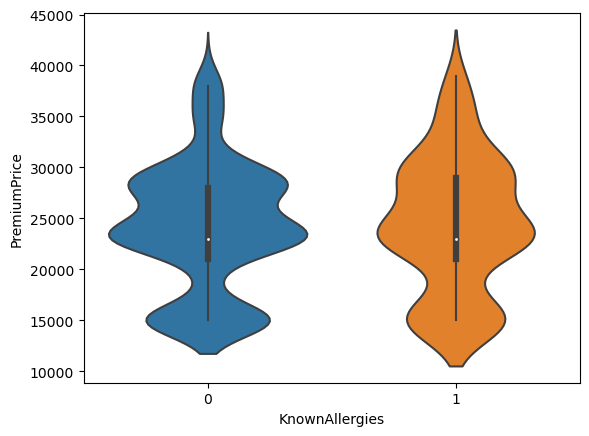

In [24]:
sns.violinplot(x = 'KnownAllergies',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='HistoryOfCancerInFamily', ylabel='PremiumPrice'>

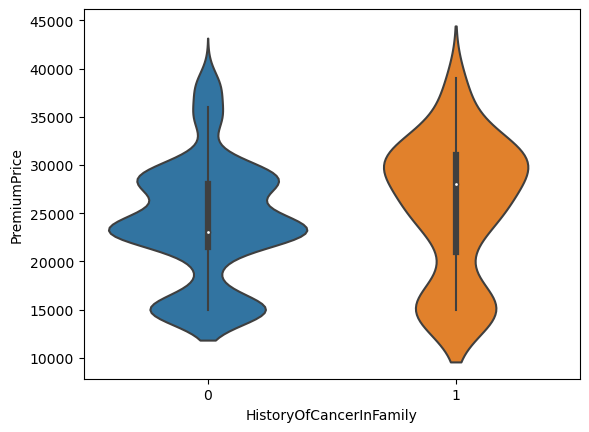

In [25]:
sns.violinplot(x = 'HistoryOfCancerInFamily',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='NumberOfMajorSurgeries', ylabel='PremiumPrice'>

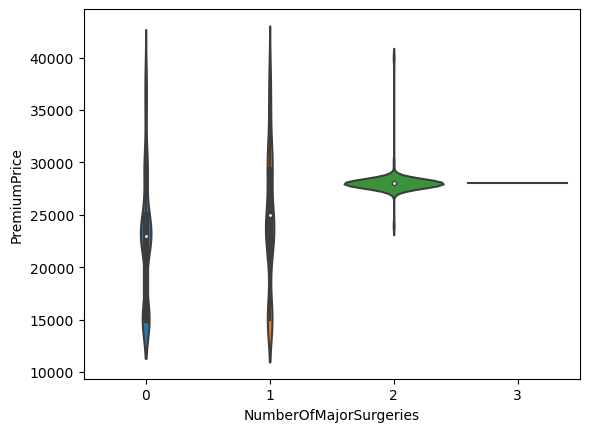

In [26]:
sns.violinplot(x = 'NumberOfMajorSurgeries',y='PremiumPrice',data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

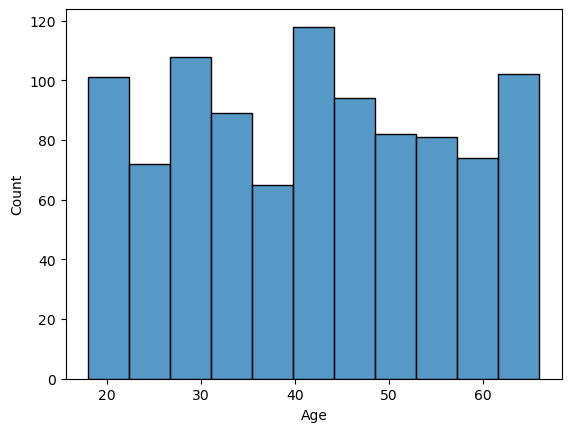

In [27]:
sns.histplot(df['Age'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

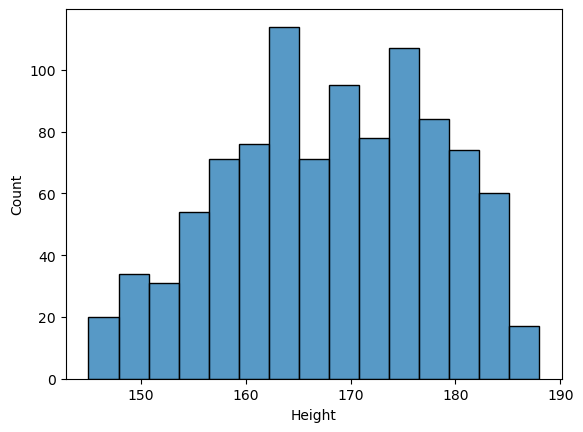

In [28]:
sns.histplot(df['Height'])

<AxesSubplot:xlabel='Weight', ylabel='Count'>

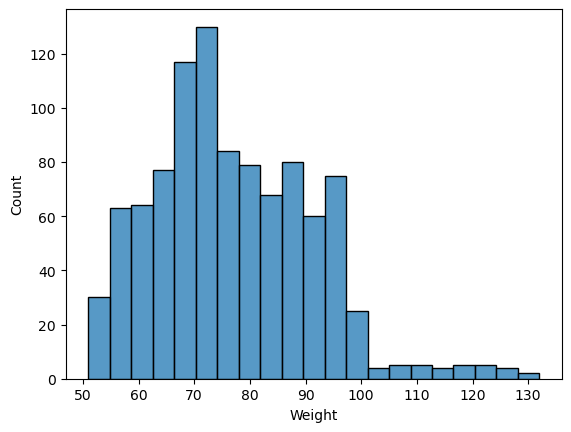

In [29]:
sns.histplot(df['Weight'])

<AxesSubplot:xlabel='PremiumPrice', ylabel='Count'>

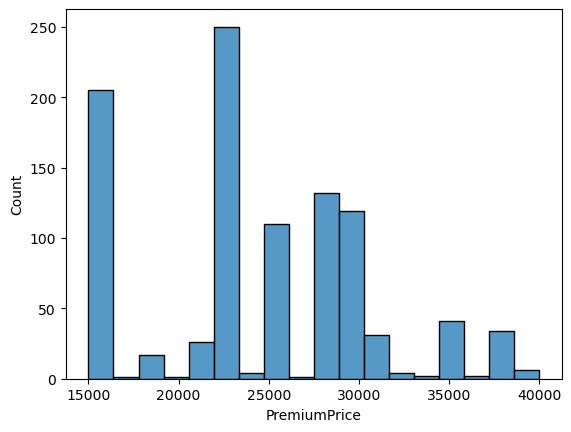

In [32]:
sns.histplot(df['PremiumPrice'])

<AxesSubplot:xlabel='Age'>

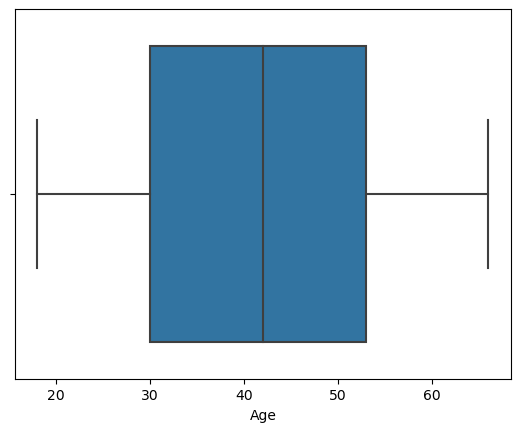

In [33]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Height'>

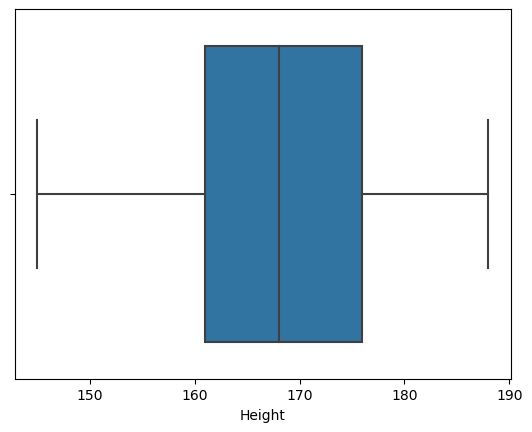

In [34]:
sns.boxplot(df['Height'])

<AxesSubplot:xlabel='Weight'>

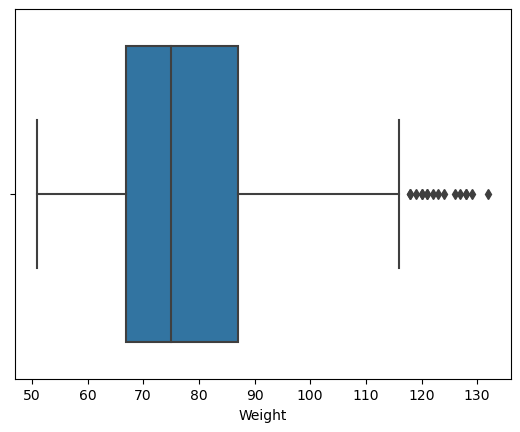

In [35]:
sns.boxplot(df['Weight'])

In [54]:
X = df.drop(columns=['PremiumPrice'],axis=1)

In [55]:
X.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,0,0,0
1,60,1,0,0,0,180,73,0,0,0
2,36,1,1,0,0,158,59,0,0,1
3,52,1,1,0,1,183,93,0,0,2
4,38,0,0,0,1,166,88,0,0,1


In [56]:
y = df['PremiumPrice']

In [57]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [58]:
X = preprocessor.fit_transform(X)

In [59]:
X.shape

(986, 19)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((788, 19), (198, 19))

In [61]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [63]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3778.3832
- Mean Absolute Error: 2667.9391
- R2 Score: 0.6249
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3514.0146
- Mean Absolute Error: 2580.4444
- R2 Score: 0.7104
Lasso
Model performance for Training set
- Root Mean Squared Error: 3767.5474
- Mean Absolute Error: 2670.5102
- R2 Score: 0.6271
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3474.3017
- Mean Absolute Error: 2567.8584
- R2 Score: 0.7169
Ridge
Model performance for Training set
- Root Mean Squared Error: 3767.6478
- Mean Absolute Error: 2671.4521
- R2 Score: 0.6271
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3477.2197
- Mean Absolute Error: 2569.7305
- R2 Score: 0.7165
K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3264.3203
- Mean Absolute Error: 2078.4264
- R2 S

In [64]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.873726
7,CatBoosting Regressor,0.838012
6,XGBRegressor,0.835405
1,Lasso,0.716933
2,Ridge,0.716457
0,Linear Regression,0.710425
4,Decision Tree,0.672283
3,K-Neighbors Regressor,0.606939
8,AdaBoost Regressor,0.519692


In [65]:
ran_model = RandomForestRegressor()
ran_model = ran_model.fit(X_train, y_train)
y_pred = ran_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.56


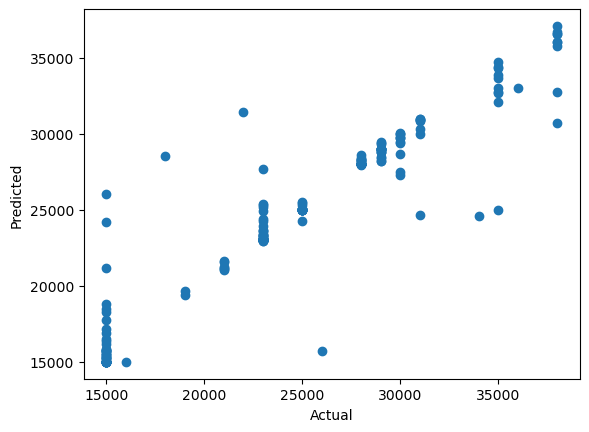

In [66]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

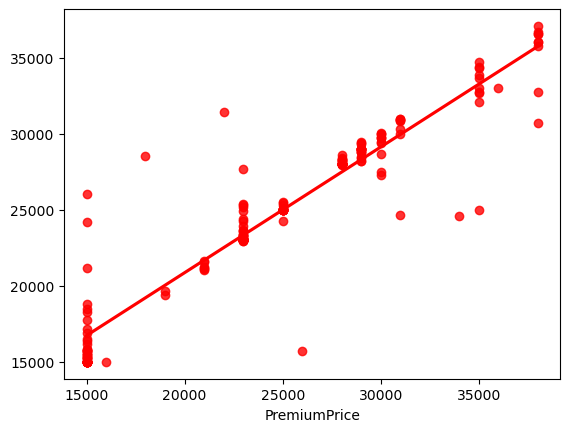

In [67]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [68]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
613,31000,30320.0,680.0
451,31000,30000.0,1000.0
731,29000,29450.0,-450.0
436,15000,15200.0,-200.0
275,23000,23430.0,-430.0
...,...,...,...
209,35000,34750.0,250.0
506,29000,29000.0,0.0
49,15000,15300.0,-300.0
717,28000,28000.0,0.0


In [69]:
import bz2,pickle
file = bz2.BZ2File('modelForPrediction.pkl','wb')
pickle.dump(ran_model,file)
file.close()